# Project 3: Predicting 7 Day Retention in Gaming

## Story
This project uses a dataset of online gaming behaviors of players across multiple types of games. The goal is to predict players retention to gaming in a 7 day span, based on certain features such as time spent playing, session frequency, and in-game engagement.

This task is going to be solved using regression, with the target variable being total minutes played the following week. A proxy for short term.

In [39]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Data Understanding & Pre-Processing
First, we read in our csv file into our notebook from Kaggle. Link: https://www.kaggle.com/code/nileshely/predicting-player-engagement/input 

In [40]:
ogb_df = pd.read_csv("online_gaming_behavior_dataset.csv")
ogb_df

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium


In [41]:
ogb_df.isnull().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

Above we are checking for any null values in our dataset. Luckily, there are no null values in any column so that saves us a lot of time in pre-processing our data. First, we need to drop the PlayerID column since we can't have unique identifiers in our training and test sets. So we drop the PlayerID column below.

In [42]:
ogb_df.drop(columns=['PlayerID'], inplace=True)
ogb_df

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
40029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium


On Kaggle where I got the dataset, it showed that for GameDifficulty and EngagementLevel, there were only three different options. When confirming with CoPilot if my syntax was correct for my get_dummies later on, it suggested I label encode these two columns. Get_dummies typically does this, but when you have fixed set of values it's better to use LabelEncoder. Later on when we do so, it'll make medium be 2, easy be 0, and hard be 1. Something to take note as mentioned by CoPilot, it doesn't perserve order.

In [43]:
print(ogb_df['GameDifficulty'].unique())
print(ogb_df['EngagementLevel'].unique())

['Medium' 'Easy' 'Hard']
['Medium' 'High' 'Low']


Above is just us checking all the unique values in those columns to double check. Below is where we do the LabelEncoding, along with converting columns 'GameGenre', 'Gender', and 'Location' to numerical labels.

In [44]:
ogb_df = pd.get_dummies(ogb_df, columns=['GameGenre', 'Gender', 'Location'], drop_first=True)
le_difficulty = LabelEncoder()
le_engagement = LabelEncoder()
ogb_df['GameDifficulty'] = le_difficulty.fit_transform(ogb_df['GameDifficulty'])
ogb_df['EngagementLevel'] = le_engagement.fit_transform(ogb_df['EngagementLevel'])
ogb_df

,Age,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy,Gender_Male,Location_Europe,Location_Other,Location_USA
0,43,16.271119,0,2,6,108,79,25,2,False,False,False,True,True,False,True,False
1,29,5.525961,0,2,5,144,11,10,2,False,False,False,True,False,False,False,True
2,22,8.223755,0,0,16,142,35,41,0,False,False,True,False,False,False,False,True
3,35,5.265351,1,0,9,85,57,47,2,False,False,False,False,True,False,False,True
4,33,15.531945,0,2,2,131,95,37,2,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,32,20.619662,0,0,4,75,85,14,2,False,False,False,True,True,False,False,True
40030,44,13.539280,0,1,19,114,71,27,0,False,True,False,False,False,False,True,False
40031,15,0.240057,1,0,10,176,29,1,0,True,False,False,False,False,False,False,True
40032,34,14.017818,1,2,3,128,70,10,2,False,False,True,False,True,False,False,True


## Experiment 1

Now that we pre-processed our data, it's time to make our linear regression model. But first we need to make a new column called 'avgMinutesPerWeek', which is 'SessionsPerWeek' times 'AvgSessionDurationMinutes'. Then for our x values, we have our dataframe but with 'avgMinutesPerWeek' dropped called features. Our y values, our targets, just the 'avgMinutesPerWeek'. Then we go through the usuals with the model, have it set as a LinearRegression. Then we create our root mean squared error variable, which tells us how far off our predictions are from the actual results. This helps us evaluate our performance of our regression model.

In [45]:
ogb_df['avgMinutesPerWeek'] = ogb_df['SessionsPerWeek'] * ogb_df['AvgSessionDurationMinutes']
features = ogb_df.drop(columns='avgMinutesPerWeek')
target = ogb_df['avgMinutesPerWeek']
X_train1, X_test1, y_train1, y_test1 = train_test_split(features, target, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train1, y_train1)
y_pred1 = model.predict(X_test1)
rmse = py.sqrt(mean_squared_error(y_test1, y_pred1))
print(f"RMSE: {rmse:.4f}")

RMSE: 248.4812


We see here that our RMSE for this model is 248.4812. This means our model's predictions are off by about 248 minutes per week, on average. But just looking at a number can't really help us see the full story. That's why below we are going to use a scatter plot to visualize the model.

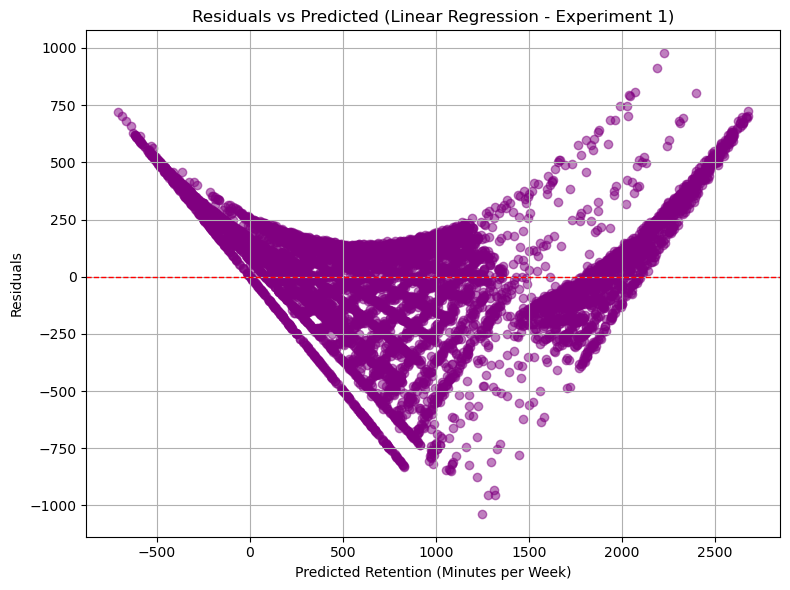

In [51]:
residuals1 = y_test1 - y_pred1

plt.figure(figsize=(8,6))
plt.scatter(y_pred1, residuals1, alpha=0.5, color='purple')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Predicted Retention (Minutes per Week)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Linear Regression - Experiment 1)")
plt.grid(True)
plt.tight_layout()
plt.show()


Now that we have our scatter plot, we have more insight into our model. Our range of the residuals is between 1000 and -1000, but a good majority of them clustered closer to zero. We can see that this model can't handle nonlinear patterns or any high retention outliers. With higher and lower predicted values, we see larger residuals, suggesting there is some systematic bias. This means that the model is consistently making errors in a predictable way, which is why our scatter plot begins to take some shape. This is okay, since this is our first experiment and we have two more to do.

## Experiment 2

After finishing Experiment 1, I asked CoPilot recommendations as to how I should conduct my second Experiment. It recommended I used a Random Forest Regressor, as it is a more flexible model to work with, since it was a problem we saw in our first experiment. So we used the same train and test variables for the model.

In [48]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train1, y_train1)
rf_pred = rf_model.predict(X_test1)

rf_rmse = py.sqrt(mean_squared_error(y_test1, rf_pred))
print(f"Random Forest RMSE: {rf_rmse:.4f}")

Random Forest RMSE: 6.1474


Now that we have our Random Forest RMSE, we see that this model's predictions are off by 6 minutes per week, on average. Compare that to the 248 from before, this is an improvement. As I mentioned before, because this is nonlinearity its easier to model the many combinations of features. Also the extreme values don't throw it off.

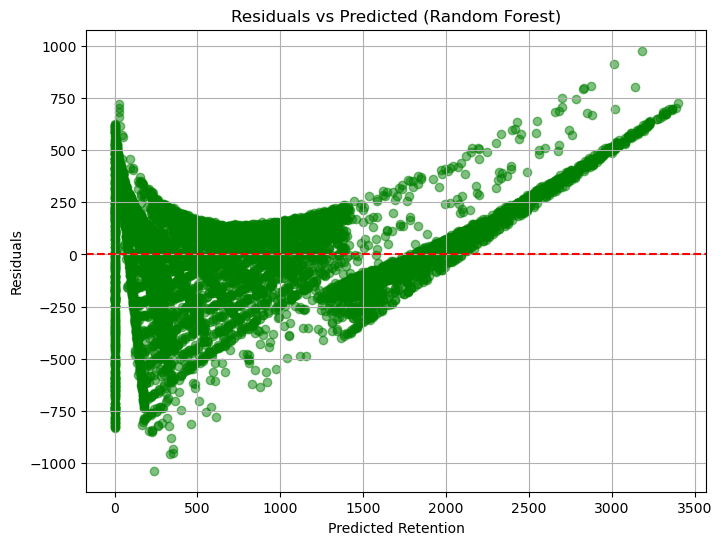

In [ ]:
rf_residuals = y_test1 - y_pred1
plt.figure(figsize=(8,6))
plt.scatter(rf_pred, rf_residuals, alpha=0.5, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Retention")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Random Forest)")
plt.grid(True)
plt.show()

Here we can see the range is same, but our residuals are much closer to zero near the low to mid range predicted retention values. But as we get larger in our predictions, the model's errors increase. This is called heteroscedasticity as CoPilot explained to me. What this means for our model is that while lower to mid level retention players it has high confidence, that confidence decreases for high retention players. So, while our Random Forest is our best model yet, it's not perfect. Especially when it comes to extreme cases.

## Experiment 3

Now for the 3 and final experiment, we are going back to the setup from the first experiment. Only now we are going to log tranform our data before fitting it. This means for our target values, the log1p() method compresses large retention values in order to reduce the skew. We stick with the linear regression for our model, and we predict in the log space. Then once that's done, we use the expm1() method to reverse the log transformation back to its original scale.

In [49]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(features, target, test_size=0.2, random_state=42)
y_train_log = py.log1p(y_train3)
y_test_log = py.log1p(y_test3)

model3 = LinearRegression()
model3.fit(X_train3, y_train_log)

y_pred_log = model3.predict(X_test3)
y_pred3 = py.expm1(y_pred_log)

rmse2 = py.sqrt(mean_squared_error(y_test3, y_pred3))
print(f"RMSE: {rmse2:.4f}")

RMSE: 681.7096


So here we see the RMSE is about 681, which indicates the model's predictions are off by about 681 minutes per week on average. Since we used a log transformation, we expected the RMSE to change, but not like this. But when we reversed the transformation, the small errors in that log space then become large errors in the original space. Even though the RMSE is higher, the model can still be more stable and less biased. So while the RMSE here is higher than Experiment 1, Experiment 3 is less biased.

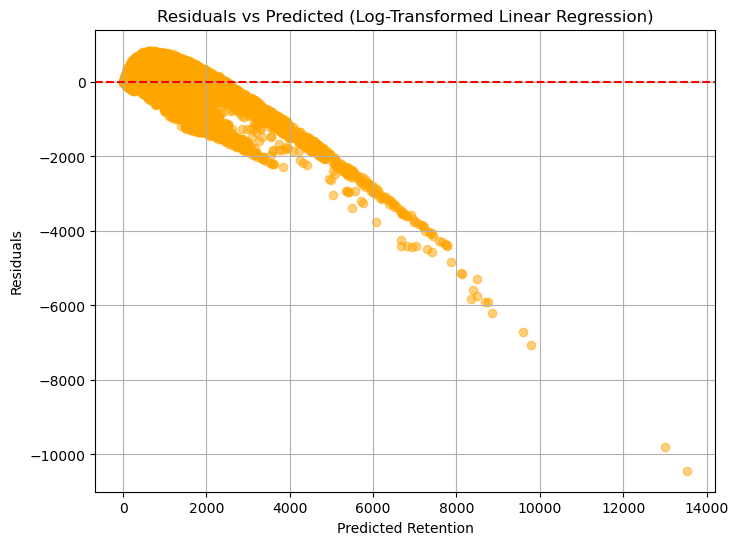

In [50]:
residuals3 = y_test3 - y_pred3

plt.figure(figsize=(8,6))
plt.scatter(y_pred3, residuals3, alpha=0.5, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Retention")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Log-Transformed Linear Regression)")
plt.grid(True)
plt.show()

Here we see a large majority of the predicted retention residuals clustered near 0 for low to mid level retention players. And we see that funneling effect we saw in Experiment 1. Meaning we have systematical bias in this model too. So while the model fix the skewedness of the model, there isn't much structure for high-retention players. If we had done this for a Random Forest it might help, but that's an experiment for another day.

## Impact Section
Now that we've completed all our experiments and done our evaluations for each of them, let's look at some different impacts our results carry.

- Positive: With these retention insights, developers can use it to tailor their games' difficulties, pacing, and rewards in hopes to keep players engaged and playing them. Also, it can contribute to personalized support by predicting which players are most likely to drop the game and offer them support, such as tutorials and community support.
- Ethical Concerns: If retention models are used to maximize playtime without regard for player well being, they could encourage addictive behaviors. Plus, behavioral data- , even anonymized, can reveal sensitive patterns. If misused or poorly secured, it could compromise user trust or be repurposed for surveillance-like profiling.

## Conclusion
This project explored predicting player retention using behavioral data from online games. Three modeling experiments revealed key insights:

- Linear regression (Experiment 1) gave a baseline RMSE of 248.48 but showed systematic bias and limited ability to capture complex patterns.

- Random Forest (Experiment 2) dramatically improved performance with an RMSE of 6.15, showing the power of nonlinear models to handle feature interactions and outliers.

- Log-transformed linear regression (Experiment 3) helped reduce bias and stabilize variance, but had a higher RMSE of 681.71 due to transformation effects.

Overall, the project demonstrated how model choice and target transformation impact predictive accuracy. It highlighted the importance of residual analysis, and showed that even with the same features, different preprocessing and modeling strategies can lead to very different outcomes.

### References
All mentions of CoPilot in explaining certain topics or recommendations of experiment changes. No code was requested, only templates for syntax understanding.